Podemos utilizar os conceitos de funções para implementar uma forma de encontrar a raiz de uma certa equação. Na aula assíncrona, implementamos o método da biseção. Neste problema, vamos implementar o [Método de Newton–Raphson](https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Newton%E2%80%93Raphson) para encontrar raízes. Esse método pode ser mais rápido que o anterior, porém necessitamos conhecer tanto a função $f(x)$ quanto sua derivada, $f'(x)$. 

Começando com um *chute* $x_1$, e calculando os valores de $f(x_1)$ e $f'(x_1)$, uma reta $g_1(x)$ tangente à curva é traçada para obter o valor de $x_2$ para o qual a reta intercepta o eixo $x$, *i.e.*, $g_1(x_2) = 0$. Se o valor de $f(x_2)$ está próximo de 0 com uma tolerância $\epsilon$, dizemos que $x_2$ é uma aproximação para a raiz da função. Caso contrário, a ação se repete até encontrarmos um valor dentro da margem de tolerância.

Para cada valor $x_i$, a reta tangente é dada por 

$$g_i(x) = [f'(x_i)](x-x_i)+f(x_i).$$

A solução para $g_i(x_{i+1})=0$ é

$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}.$$

Imagem ilustrativa do método funcionando: 

![metodo](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)

[(fonte)](https://en.wikipedia.org/wiki/File:NewtonIteration_Ani.gif)

### Item (a)

- Implemente uma função chamada `newton()` com os seguintes argumentos:

  - `f`: função $f(x)$
  - `df`: função derivada de $f(x)$
  - `x0`: chute inicial de onde está a raiz
  - `eps`: tolerância, que toma um valor padrão igual a `1e-6`.
  - `n_max`: número máximo de iterações, com valor padrão igual a `100`.

  Essa função deve retornar dois números, na ordem:

  - O valor aproximado da raiz
  - O número de iterações efetuadas para chegar nessa raiz.

  Dentro da função, implemente o método de Newton–Raphson. Um esqueleto da função é apresentado abaixo, e deve ser alterado. Um `if` é necessário dentro do *loop* para que a função termine o cálculo quando o número de iterações for `n_max`.

In [1]:
### ESQUELETO ###
def newton(f, df, x0 ,eps, n_max):
  """
  Função para retornar uma estimativa da raiz de uma função f(x) com tolerância eps.
  """
  n_it = 0
  xi = x0
  teste = x0
  erro=0

  while  df(xi) != 0: #vi que seguindo a aula dava pra fazer a comparação entre df e eps e fui testando com outras comparações também.
#fazendo assim eu perderia alguma informação ou o programa rodaria mais vezes?
    x = f(xi) #alterando o valor da função
    dx = df(xi) #alterando o valor da derivada 
    xi = x0 - x/dx #funcionando ok 
    erro = xi - teste
    if n_it == n_max:
      #print("entrei aqui") #testando se ta condição funciona ok
      break
    if abs(erro)<=eps:
      #print("entrei aqui no erro") #testando se ta condição funciona ok
      break  
    teste = xi
    x0=xi
    n_it= n_it+1

  return [xi, n_it]   # retorna a raiz e o número de iterações efetuadas

### Item (b)

- Agora, chame a função `newton` para obter a raiz da função $cos(x)$, com um chute inicial ao seu critério. Note que é possível colocar diretamente a função `cos()` como argumento, mas poderá ter problema ao colocar `df`. Você pode criar as funções `f()` e `df()` ou utilizar o `lambda`, como fizemos em aula.
- Imprima a raiz obtida e quantas iterações foram necessárias

In [2]:
from math import cos, sin, pi, exp
f = lambda x: cos(x)
df = lambda x: -sin(x)
x0 = 3*pi/4
eps= 10**-6
n_max =100
if df(x0) == 0:
  print("o número que você escolheu causa uma divisão por 0")
else: 
  resp1 = newton(f, df, x0, eps, n_max)
  print(f"A raiz é: {resp1[0]:.3f}, e o número de iterações foi: {resp1[1]}") 

A raiz é: 1.571, e o número de iterações foi: 3


### Item (c)

Vamos testar esse método onde pode dar problemas. Um desses casos é quando não existe uma raiz. 

- Aplique a função `newton()` para a função $f(x) = x^2 + 2$, com chute inicial ao seu critério, com no máximo $1000$ iterações.
- Responda (utilizando `print()`): podemos considerar que o valor obtido é a raiz da função?

In [3]:
f = lambda x: x**2 + 2
df = lambda x: 2*x
x0 = 5
eps= 10**-6
n_max =1000
if df(x0) == 0:
  print("o número que você escolheu causa uma divisão por 0")
else: 
  resp2 = newton(f, df, x0, eps, n_max)
  print(f"A raiz é: {resp2[0]:.3f} e o número de iterações foi: {resp2[1]}") 
  print("\nNão, pois independentemente do valor chutado o programa gastará todas as iterações e não obteremos um valor proximo da raiz.\nComo a função não tem uma raiz real o programa nos fornece números aleatórios que dependem da condição inicial.")

A raiz é: -17.911 e o número de iterações foi: 1000

Não, pois independentemente do valor chutado o programa gastará todas as iterações e não obteremos um valor proximo da raiz.
Como a função não tem uma raiz real o programa nos fornece números aleatórios que dependem da condição inicial.


### Item (d)

O método também pode falhar quando caímos em um intervalo assíntotico da função. Considere, por exemplo, a função $f(x) = x\exp(-x)$. Ela tem uma raiz, mas dependendo do chute podemos ir para uma região assintótica, não exatamente zero, na qual o método retorna uma pseudo raiz por conta do valor estar dentro do limite de tolerância.

- Utilize a função `newton()` com uma tolerância de $10^{-7}$ e valor padrão de limite de iterações, para a função $f(x) = x\exp(-x)$. Faça testes com pelo menos **2 chutes**, que resultem na raiz correta, e outro em um valor incorreto. O gráfico abaixo ajudará a decidir os valores.

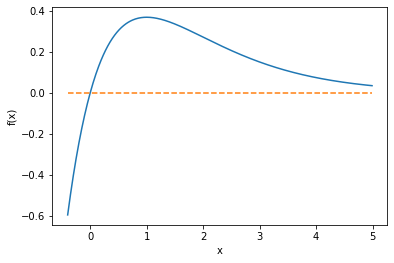

In [4]:
f = lambda x: x*exp(-x)
df = lambda x: exp(-x) - x*exp(-x)
x0 = 1.5
eps= 10**-7
n_max =100
if df(x0) == 0:
  print("o número que você escolheu causa uma divisão por 0")
else: 
  resp3 = newton(f, df, x0, eps, n_max)
  print(f"A raiz é: {resp3[0]:.3f} e o número de iterações foi:  {resp3[1]}")

A raiz é: 107.805 e o número de iterações foi:  100


### Item (e) 

Em muitos problemas de física, podemos encontrar as chamadas equações transcendentais, que só podem ser resolvidas numericamente. 

- Encontre a solução para 
$x = \cos(x)$
e imprima o resultado utilizando a função `print()` formatada para até 5 casas decimais, mostrando também o número de iterações necessárias para o chute inicial escolhido.

  > A saída deve ser parecida com a seguinte:
  > 
  > `A raiz é 0.73909, e o método utilizou 3 iterações.`

- Repita para pelo menos mais 3 chutes iniciais diferentes.

In [5]:
from random import randint #coloquei um geradorzin pra ver como funcionava 
f = lambda x: x - cos(x)
df = lambda x: 1 + sin(x)
x0 = 50
eps= 10**-7
n_max =100
for i in range(0,3):
  x0 = randint(1,1000)
  resp4 = newton(f, df, x0, eps, n_max)
  print(f"A raiz é: {resp4[0]:.5f}\tO número de iterações foi: {resp4[1]} \tValor chutado: {x0}") 
  #fiquei em duvida em relação a alguns valores que explodem
  #talvez o número maximo de iterações seja menor?
  #varias vezes que atualizei apareceu o valor esperado, mas outras explodia
  #Pensando também que a derivada poderia dar um valor muito pequeno e proximo de 0 causando um problema na execução

A raiz é: -315110081.12748	O número de iterações foi: 100 	Valor chutado: 400
A raiz é: -105787024854294137371885568.00000	O número de iterações foi: 100 	Valor chutado: 179
A raiz é: 0.73909	O número de iterações foi: 8 	Valor chutado: 549
